ModelZipper is ready for launch🚀 | Current Version🦄 >>> 0.2.7 <<< | AOE Time🕒 2024-12-17 19:54:18


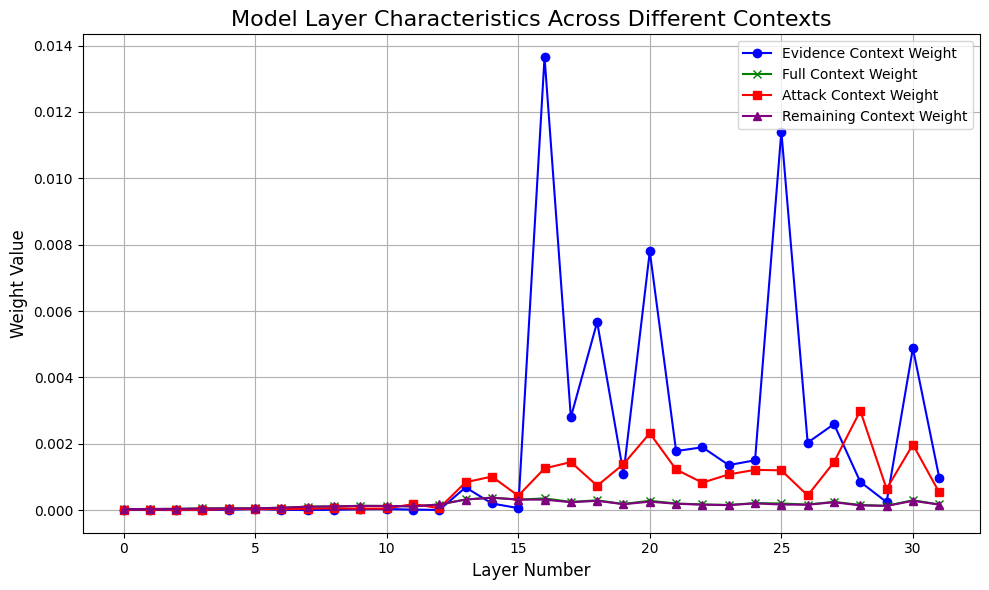

In [ ]:
from modelzipper.tutils import *
import matplotlib.pyplot as plt
import numpy as np

# 数据：每层的四个权重数值
layer_data = {
    0: [4.959665238857269e-06, 3.241457776316934e-05, 1.915307207541032e-05, 3.2536576766406514e-05],
    1: [6.113294512033463e-06, 3.588264777170998e-05, 1.875220826177886e-05, 3.602615563138125e-05],
    2: [3.3918768167495728e-06, 3.954556222308137e-05, 1.3849161791078972e-05, 3.973980739152632e-05],
    3: [4.411069676280022e-06, 5.2358093491322196e-05, 8.825382048433477e-06, 5.265427548364616e-05],
    4: [1.409146934747696e-05, 5.386575933844638e-05, 3.642363078666456e-05, 5.403527912603641e-05],
    5: [3.511123359203339e-05, 5.6201644940101574e-05, 3.5292892293496564e-05, 5.633910748514353e-05],
    6: [1.1113425716757775e-05, 7.276903453996061e-05, 2.8178434700803887e-05, 7.310343142066736e-05],
    7: [5.842046812176705e-06, 0.0001060344519507986, 4.455788681904475e-05, 0.0001065330393336028],
    8: [1.1762231588363648e-05, 0.0001127064162164015, 5.673789278124318e-05, 0.00011318438913503663],
    9: [2.7908291667699813e-05, 0.00013008105668458142, 4.593079740350897e-05, 0.00013067705246309438],
    10: [3.418363630771637e-05, 0.0001264135955578132, 5.119948676138213e-05, 0.00012694854421944576],
    11: [1.703500747680664e-05, 0.00011598208717596412, 0.00018443663914998373, 0.00011594746073912442],
    12: [8.40499997138977e-06, 0.00017115683509330904, 6.23587067380096e-05, 0.00017200319697982774],
    13: [0.0006855845451354981, 0.00032301160542711025, 0.0008409402587197044, 0.0003200018249680569],
    14: [0.00020253956317901612, 0.0003778427242573789, 0.0010134717731764822, 0.0003756827718102024],
    15: [6.217481568455696e-05, 0.00031942024437131556, 0.00043356729050477344, 0.0003195906271669796],
    16: [0.013655662536621094, 0.0003536513946724383, 0.001258882609280673, 0.0003170647412450094],
    17: [0.0028010547161102296, 0.00025052682229714346, 0.0014491054144772616, 0.00023932953601892812],
    18: [0.005669236183166504, 0.00029643327858037727, 0.0007366122621478456, 0.0002813514333096739],
    19: [0.0010981798171997071, 0.0001875015840294935, 0.001387981077035268, 0.0001803515607935149],
    20: [0.007794710993766785, 0.0002826679076511171, 0.0023177458029804807, 0.0002557887740868018],
    21: [0.0017806708812713623, 0.00020140549310989484, 0.001226557023597486, 0.0001933175469836189],
    22: [0.001896064169704914, 0.00017294463764580063, 0.0008285483627608328, 0.00016600876801548678],
    23: [0.0013591922819614411, 0.00015825946183714815, 0.0010787226033933234, 0.0001515341972385033],
    24: [0.0015029147267341613, 0.0002128314567774904, 0.001215286637571725, 0.00020555120376496033],
    25: [0.011409810930490493, 0.0002014303863407309, 0.0012002720031887293, 0.0001696389194466929],
    26: [0.0020347237586975098, 0.00016976514241572694, 0.0004434507114417625, 0.00016403680461855895],
    27: [0.002594304084777832, 0.00025047442936777206, 0.0014475617896426809, 0.00023979435073309436],
    28: [0.0008534610271453858, 0.00015710730061251676, 0.0029951467206983857, 0.00014380581997533933],
    29: [0.00024196654558181763, 0.0001313316633156309, 0.0006413843595620358, 0.00012897700992524328],
    30: [0.004878909885883331, 0.00029894708488866395, 0.0019776151713096733, 0.0002807725914574342],
    31: [0.0009814728051424026, 0.0001716352537038241, 0.0005350086386456634, 0.00016815008150651299],
}

# 提取数据
layers = list(layer_data.keys())
values = np.array(list(layer_data.values()))

# 为每个层的四个数值分别定义一个系列
evidence_weight = values[:, 0]
full_context_weight = values[:, 1]
attack_context_weight = values[:, 2]
remaining_context_weight = values[:, 3]

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每层的四个权重
plt.plot(layers, evidence_weight, label='Evidence Context Weight', color='blue', marker='o')
plt.plot(layers, full_context_weight, label='Full Context Weight', color='green', marker='x')
plt.plot(layers, attack_context_weight, label='Attack Context Weight', color='red', marker='s')
plt.plot(layers, remaining_context_weight, label='Remaining Context Weight', color='purple', marker='^')

# 添加标题和标签
plt.title('Model Layer Characteristics Across Different Contexts', fontsize=16)
plt.xlabel('Layer Number', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.legend()

# 显示图形
plt.grid(True)
plt.tight_layout()
plt.show()